In [2]:
#Import libraries
import matplotlib.pyplot as plt

from keras.datasets import mnist

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, ShuffleSplit

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.pipeline import Pipeline

Loading MNIST data


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Shape of training data", X_train.shape)
print("Shape of test data", X_test.shape)

print("Shape of training labels", y_train.shape)
print("Shape of test labels", y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
Shape of training data (60000, 28, 28)
Shape of test data (10000, 28, 28)
Shape of training labels (60000,)
Shape of test labels (10000,)


In [4]:
#Flattening
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

#Normalising
X_train = X_train/255
X_test = X_test/255

In [5]:
print("Shape of training data", X_train.shape)
print("Shape of test data", X_test.shape)

print("Shape of training labels", y_train.shape)
print("Shape of test labels", y_test.shape)

Shape of training data (60000, 784)
Shape of test data (10000, 784)
Shape of training labels (60000,)
Shape of test labels (10000,)


In [6]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

helper functions

In [7]:
def train_classifiers(estimator, X_train, y_train, cv, name):
    estimator.fit(X_train, y_train)
    cv_train_score = cross_val_score(
        estimator, X_train, y_train, cv = cv, scoring='f1_macro'
    )

    print(f"On an average, {name} model has f1 score of "
            f"{cv_train_score.mean():.3f} +/- {cv_train_score.std():.3f} on the training set.")

In [8]:
def eval(estimator, X_test, y_test):
    y_pred = estimator.predict(X_test)

    print("# Classification report")
    print(classification_report(y_test, y_pred))

    print("# Confusion matrix")
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.title('Confusion matrix')
    plt.show()

#### Decision trees

In [9]:
decision_tree_pipeline = Pipeline([("classifier", DecisionTreeClassifier())])
train_classifiers(
    decision_tree_pipeline, X_train, y_train.ravel(),
    cv, "decision tree"
)

On an average, decision tree model has f1 score of 0.868 +/- 0.003 on the training set.


# Classification report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.88      0.85      0.87      1032
           3       0.82      0.85      0.84      1010
           4       0.88      0.88      0.88       982
           5       0.83      0.84      0.84       892
           6       0.90      0.88      0.89       958
           7       0.91      0.90      0.90      1028
           8       0.83      0.81      0.82       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

# Confusion matrix


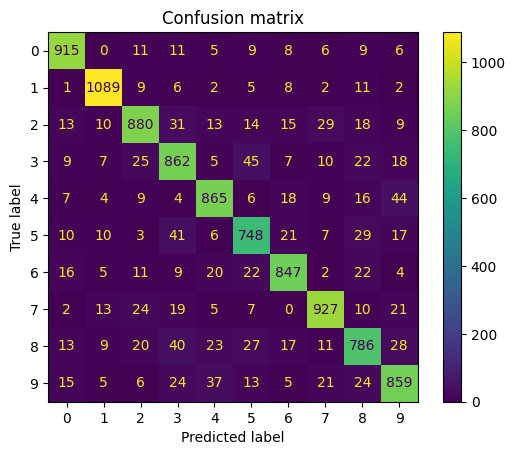

In [10]:
eval(decision_tree_pipeline, X_test, y_test)

#### MNIST classification with bagging

uses decision tree classifier by default and trains multiple decision tree classifiers on different bags obtained through bootstrap sampling of training data.

In [11]:
bagging_pipeline = Pipeline([("Classifier", BaggingClassifier())])
train_classifiers(bagging_pipeline, X_train, y_train.ravel(), cv, "bagging")

On an average, bagging model has f1 score of 0.938 +/- 0.003 on the training set.


# Classification report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.92      0.94      0.93      1032
           3       0.93      0.93      0.93      1010
           4       0.95      0.95      0.95       982
           5       0.93      0.92      0.93       892
           6       0.96      0.95      0.96       958
           7       0.96      0.95      0.95      1028
           8       0.95      0.90      0.92       974
           9       0.94      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

# Confusion matrix


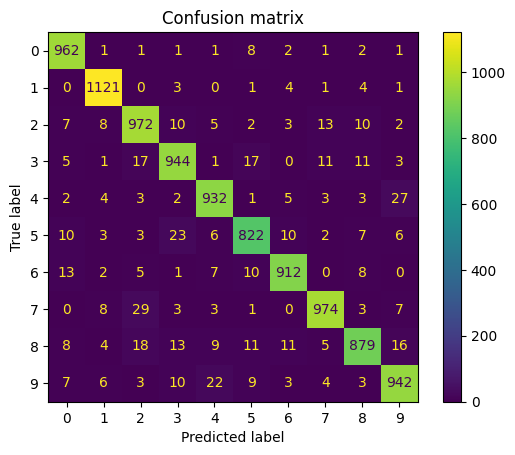

In [12]:
eval(bagging_pipeline, X_test, y_test)

#### Random forest

also uses bagging technique, which trains decision tree classifiers by randomly selecting attributes for splitting on bags of bootstrap sample of training data.

In [13]:
rf_pipeline = Pipeline([("classifier", RandomForestClassifier())])
train_classifiers(rf_pipeline, X_train, y_train.ravel(), cv, "bagging")

On an average, bagging model has f1 score of 0.967 +/- 0.002 on the training set.


# Classification report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

# Confusion matrix


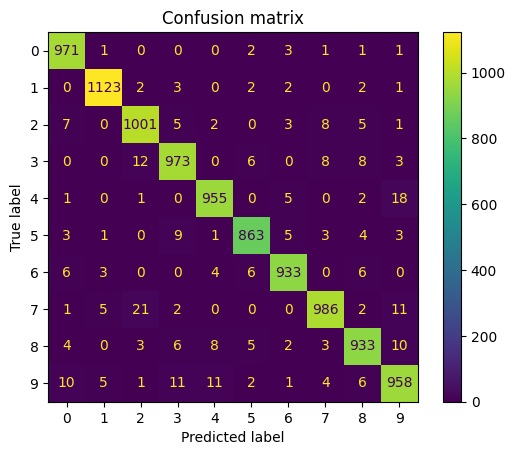

In [14]:
eval(rf_pipeline, X_test, y_test)

In [18]:
rf_pipeline[-1].estimator_

DecisionTreeClassifier()

In [24]:
rf_pipeline[-1].estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=912169049),
 DecisionTreeClassifier(max_features='sqrt', random_state=246863169),
 DecisionTreeClassifier(max_features='sqrt', random_state=767347405),
 DecisionTreeClassifier(max_features='sqrt', random_state=942086218),
 DecisionTreeClassifier(max_features='sqrt', random_state=567766749),
 DecisionTreeClassifier(max_features='sqrt', random_state=2143085066),
 DecisionTreeClassifier(max_features='sqrt', random_state=269801158),
 DecisionTreeClassifier(max_features='sqrt', random_state=1269638490),
 DecisionTreeClassifier(max_features='sqrt', random_state=219255288),
 DecisionTreeClassifier(max_features='sqrt', random_state=1868066148),
 DecisionTreeClassifier(max_features='sqrt', random_state=646014797),
 DecisionTreeClassifier(max_features='sqrt', random_state=12721748),
 DecisionTreeClassifier(max_features='sqrt', random_state=1237220455),
 DecisionTreeClassifier(max_features='sqrt', random_state=455934800),
 DecisionTreeClas